In [41]:
import matplotlib.pyplot as plt
import numpy as np
import csv

In [42]:
steps = []
test_acc = []
test_loss = []
train_acc = {}
train_loss = {}
val_loss = {}
val_acc = {}

with open('results/L8H2.csv') as f:
    reader = csv.DictReader(f)

    for row in reader:
        if row['test_acc'] != '':
            test_acc.append(float(row['test_acc']))
        if row['test_loss'] != '':
            print(row['step'], row['test_loss'])
            test_loss.append(float(row['test_loss']))
        if row['train_acc_step'] != '':
            train_acc[int(row['step'])] = float(row['train_acc_step'])
        if row['train_loss'] != '':
            train_loss[int(row['step'])] = float(row['train_loss'])
        if row['val_loss'] != '':
            val_loss[int(row['step'])] = float(row['val_loss'])
        if row['val_acc'] != '':
            val_acc[int(row['step'])] = float(row['val_acc'])

7200 6.064875890388066e-08
7200 16.54923439025879
7200 7.500125408172607
7200 8.273921012878418
7200 7.500125408172607
7200 6.303584098815918


In [55]:
len(val_acc)

2

In [57]:
len(train_acc)

144

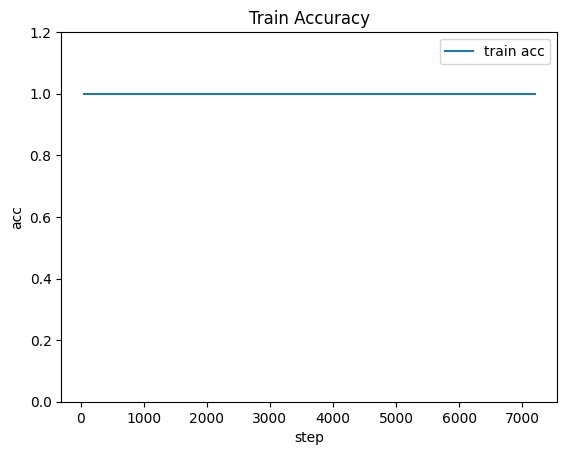

In [60]:
plt.plot(list(test_acc.keys()), list(test_acc.values()), label='train acc')

# constrain y axis to 0-1
plt.ylim(0, 1.2)

plt.legend()
plt.xlabel('step')
plt.ylabel('acc')
plt.title('Train Accuracy')
plt.show()

In [62]:
data = {
    'Testing with low-count strings': {
        'acc': 0.0,
        'loss': 16.54923439025879
    },
    'Testing with high-count strings': {
        'acc': 0.97,
        'loss': 0.0273921012878418
    },
    'Train stats': {
        'acc': 1.0,
        'loss': 6.064875890388066*1e-8
    }
}

In [63]:
data

{'Testing with low-count strings': {'acc': 0.0, 'loss': 16.54923439025879},
 'Testing with high-count strings': {'acc': 0.97, 'loss': 0.0273921012878418},
 'Train stats': {'acc': 1.0, 'loss': 6.064875890388066e-08}}

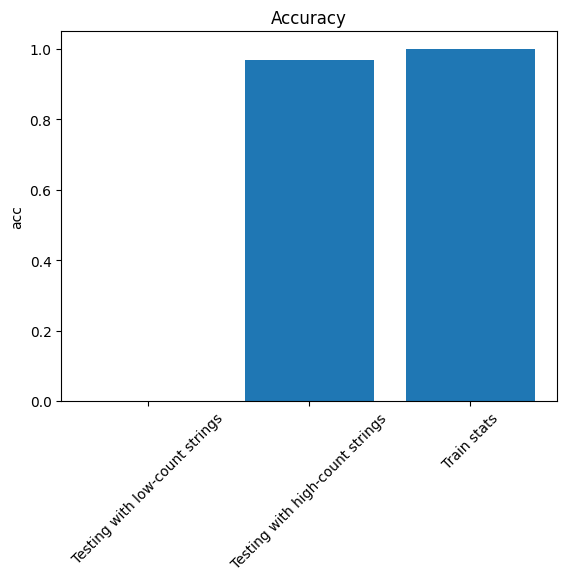

In [65]:
# plot the acc for above data
plt.bar(data.keys(), [data[x]['acc'] for x in data])
# rotate x axis labels
plt.xticks(rotation=45)
plt.ylabel('acc')
plt.title('Accuracy')
plt.show()

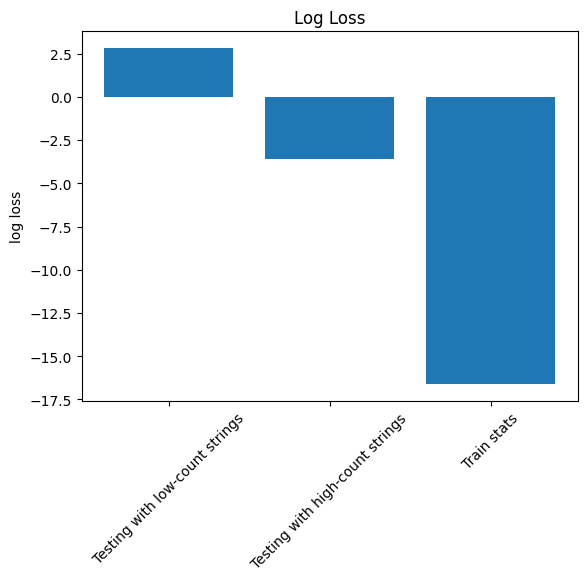

In [66]:
# plot log loss
def log_loss(data):
    plt.bar(data.keys(), [np.log(data[x]['loss']) for x in data])
    plt.xticks(rotation=45)
    plt.ylabel('log loss')
    plt.title('Log Loss')
    plt.show()

log_loss(data)

In [73]:
stack_test_loss = {}
stack_test_acc = {}
stack_test_support = {}
with open('results/L8H2.txt') as f:
    for line in f:
        row = line.strip().split(',')
        stack_test_support[int(row[0])] = int(row[1])
        stack_test_loss[int(row[0])] = float(row[2])
        stack_test_acc[int(row[0])] = float(row[3])

In [74]:
stack_test_loss

{1: 0.016458386555314064,
 6: 0.016458338126540184,
 11: 0.01645834557712078,
 16: 0.01645834557712078,
 21: 0.01645834371447563,
 26: 0.01645834557712078,
 31: 0.01645834371447563,
 36: 0.3443528711795807,
 41: 0.9272764921188354,
 46: 1.809631586074829,
 51: 1.7984939813613892,
 56: 3.236851692199707,
 61: 3.3699254989624023,
 66: 3.3699254989624023,
 71: 3.2954037189483643,
 76: 3.799856662750244,
 81: 4.115140438079834,
 86: 3.602804660797119,
 91: 4.115139961242676,
 96: 4.115139961242676,
 101: 4.115140438079834,
 106: 4.115139961242676,
 111: 4.115139961242676,
 116: 4.115139961242676,
 121: 4.115139961242676,
 131: 4.115139007568359,
 136: 4.115139961242676,
 141: 4.115139961242676,
 146: 4.115139961242676}

Text(0, 0.5, 'test loss')

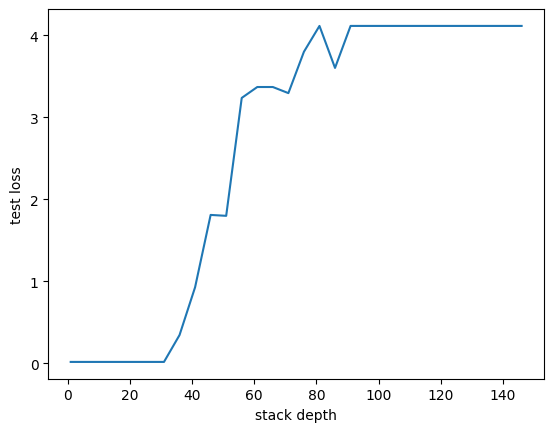

In [76]:
# plot the test loss
plt.plot(list(stack_test_loss.keys()), list(stack_test_loss.values()))
plt.xlabel('stack depth')
plt.ylabel('test loss')

Text(0, 0.5, 'test acc')

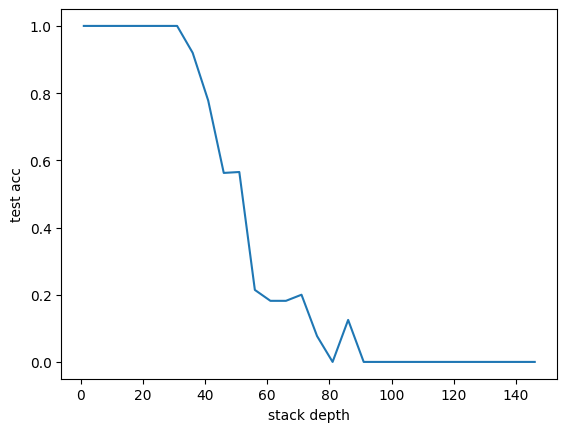

In [77]:
# plot test acc
plt.plot(list(stack_test_acc.keys()), list(stack_test_acc.values()))
plt.xlabel('stack depth')
plt.ylabel('test acc')

Text(0, 0.5, 'test support')

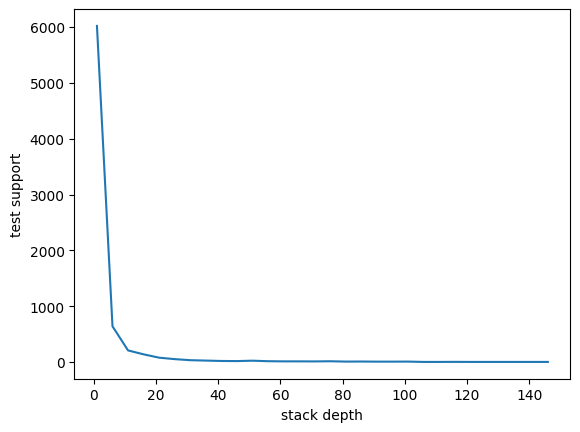

In [78]:
# plot test support
plt.plot(list(stack_test_support.keys()), list(stack_test_support.values()))
plt.xlabel('stack depth')
plt.ylabel('test support')